**Проект: Мастерская данных (HeadHunter)
<br>Студент: Марченко Валерий
<br>Когорта: da_plus_31**

# Анализ базы вакансий с HeadHunter

**Цель:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов Data Science.

**Задачи:**
- Описать “идеальных кандидатов” на должности Аналитик данных и специалист по Data Science для различных грейдов.
- Определить типичное места работы для Аналитика данных и специалиста по Data Science.
- Расчитать помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science для различных грейдов.


**Описание данных:** Нам предоставлено два датасета: первый с данными о вакасиях специалистов анализа данных и второй с вакансиями стециалистов машинного обучения. Данные получены из API HH.ru

## 1 раздел - Знакомство с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [2]:
df_da, df_ds = (
    pd.read_excel('/content/drive/MyDrive/Аналитика данных/Мастерская da_plus_31_HH/vacancies_da.xlsx'),
    pd.read_excel('/content/drive/MyDrive/Аналитика данных/Мастерская da_plus_31_HH/vacancies_ds.xlsx')
    )

In [3]:
df_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


**Структура данных:**
- `id` - id-номер вакансии
- `name` - Название вакансии
- `published_at` - Дата публикации вакансии
- `alternate_url` - ссылка на вакансию
- `type` - Тип вакансии
- `employer` - Имя работодателя
- `department` - Название подразделения работодателя
- `area` - Город
- `experience` - Требуемый опыт
- `key_skills` - Ключевые навыки
- `schedule` - Рабочий график
- `employment` - Тип занятости по времени
- `description` - Описание вакансии
- `description_lemmatized` - Ключевые слова вакансии
- `salary_from` - Нижняя граница зарплаты
- `salary_to` - Верхняя граница зарплаты
- `salary_bin` - Статус наличия данных о зарплате
- `key_skills_from_key_skills_field`- ключевые навыки из ключевых полей
- `hard_skills_from_description` - Требования к Hard Skills
- `soft_skills_from_description` - Требования к Soft Skills

In [4]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

Первый датасет с данными о вакансиях стпециалиста по анализу данных состоит из 310 вакансий (записей), каждая из которых имеет по 20 столбцов (полей). 6 полей из 20 имеют пропуски. Что примечательно, больше всего пропусков содержат поля, содержащие данные о зарплатной вилке (только около 9% записей имеют не пустые значения).

In [5]:
df_ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


In [6]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

Структура данных с информацией о вакансиях специалистов машинного обучения полностью совпадает с первым датасетом. Данная таблица содержит 662 вакансии. Точно такие жи столбцы имеют пропуски примерно с таким же процентным соотношением. Моя гипотиза заключается в том, что для вакансии на сайте HeadHunter имеются обязательные и необязательные поля для заполнения.

Перед предобработкой я добавлю к каждому датасету признак и объеденю их для удобства и экономии времени.

In [7]:
df_da['occupation'] = 'da'
df_ds['occupation'] = 'ds'

In [8]:
df = pd.concat([df_da, df_ds], ignore_index=True)

In [9]:
df.groupby('occupation')['id'].agg('count')

occupation
da    310
ds    662
Name: id, dtype: int64

Как мы видим, объединение прошло успешно. Никакие данные мы не потеряли, индексы также были перераспределены. Можем приступать к предобработке и детальному знакомству с данными по ходу проверки.

## 2 раздел - Предобработка данных

In [10]:
df.duplicated().sum()

0

Явных дубликатов не выявлено.

In [11]:
df['id'].duplicated().sum()

17

В колонке id было выявлено 17 дубликатов. Посмотрим на них.

In [12]:
df[df.duplicated('id', keep=False)].sort_values(by='id')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,occupation
17,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
371,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
18,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
372,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
419,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
56,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
74,94241749,Дата аналитик (Data Scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
456,94241749,Дата аналитик (Data Scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
459,94257136,Дата аналитик (Data Scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
75,94257136,Дата аналитик (Data Scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da


Диагноз понятен: при выгрузке данных отдельно друг от друга по ключевым словам названия вакансии в датасет попали, так назваемые full stack (одна вакасия включает в себя и аналитика данных и специалиста по Data Science). Учитывая, что нашей задачей является иммено что поиск различий между этими вакансиями, целесообразно будет удалить данные вакансии из нашего датасета.

In [13]:
df = df.drop_duplicates('id', keep=False).reset_index()

In [14]:
df['name'] = df['name'].str.lower()
df.duplicated('name').sum()

442

In [15]:
print(f"Всего уникальных название среди резюме Аналитика данных:  {len(df[df['occupation']=='da']['name'].unique())}")

Всего уникальных название среди резюме Аналитика данных:  143


In [16]:
print(f"Из них содежит слово 'data': {len(df[df['name'].str.contains('data') & (df['occupation'] == 'da')]['name'].unique())}")
print(f"Из них содежит слово 'analyst': {len(df[df['name'].str.contains('analyst') & (df['occupation'] == 'da')]['name'].unique())}")

Из них содежит слово 'data': 132
Из них содежит слово 'analyst': 127


In [17]:
df[~df['name'].str.contains('data analyst') & (df['occupation'] == 'da')]['name'].unique()

array(['ведущий дата аналитик', 'руководитель дата аналитики',
       'middle дата аналитик в recsys platform (big data)',
       'middle дата аналитик в продукт защитник (big data)',
       'дата аналитик (трек отчетность)', 'дата аналитик – инженер (dea)',
       'дата аналитик (дивизион домклик)',
       'middle дата аналитик в продукт travel (big data)',
       'дата аналитик', 'дата аналитик (middle\\senior)',
       'дата аналитик e-com',
       'дата аналитик (управление клиентского опыта в2с)',
       'middle+ дата аналитик в продукт мтс маркетолог (big data)',
       'middle дата аналитик в продукт мтс маркетолог (big data)',
       'системный/дата аналитик',
       'разработчик vba / младший дата аналитик'], dtype=object)

 Вот эти уникальных названий, не содержащие слово "Data" в своем названии. Но они все содержат "Дата аналитик". И аналитик данных и специалист по Data Science должны содержать слово дата. Как же дела обстоят со словом "Analyst", которе уточняет род деятельности...

In [18]:
df[~df['name'].str.contains('analyst') & (df['occupation'] == 'da')]['name'].unique()

array(['ведущий дата аналитик', 'руководитель дата аналитики',
       'middle дата аналитик в recsys platform (big data)',
       'middle дата аналитик в продукт защитник (big data)',
       'дата аналитик (трек отчетность)', 'дата аналитик – инженер (dea)',
       'дата аналитик (дивизион домклик)',
       'middle дата аналитик в продукт travel (big data)',
       'дата аналитик', 'дата аналитик (middle\\senior)',
       'дата аналитик e-com',
       'дата аналитик (управление клиентского опыта в2с)',
       'middle+ дата аналитик в продукт мтс маркетолог (big data)',
       'middle дата аналитик в продукт мтс маркетолог (big data)',
       'системный/дата аналитик',
       'разработчик vba / младший дата аналитик'], dtype=object)

  У всех вакансий в датасете по вакансиям аналитика данных в названии содежится либо "Data Analyst" либо "Дата Аналитик". Перейдем к слудующей вакансии.

In [19]:
print(f"Всего уникальных название среди резюме Data Science:  {len(df[df['occupation']=='ds']['name'].unique())}")

Всего уникальных название среди резюме Data Science:  353


In [20]:
print(f"Из них содежит слово 'data science': {len(df[df['name'].str.contains('data scientist') & (df['occupation'] == 'ds')]['name'].unique())}")

Из них содежит слово 'data science': 289


In [21]:
len(df[~(df['name'].str.contains('data scientist') | df['name'].str.contains('data science')) & (df['occupation'] == 'ds')]['name'].unique())

0

Как мы можем видить, все названия вакансий специалиста data science содержат слова либо "Data Science", либо  "Data scientist". Безусловно, данные вакансии таже содержат и названия связанные и с аналитикой данных, и с BI-аналитикой - каждый работодатель мечтает заполучить максимально универсального специалиста под все задачи, но основные ключевые слова мы выявили.

In [22]:
df.published_at.describe()

count                              938
mean     2024-04-08 04:53:55.124733696
min                2024-02-29 15:01:35
25%      2024-03-27 08:49:17.249999872
50%                2024-04-10 18:19:21
75%      2024-04-22 17:16:45.249999872
max                2024-04-30 12:51:55
Name: published_at, dtype: object

Все наши заявки были опубликованы в период с 29 февраля 2024 по 30 апреля 2024, то есть совершенно свежие вакансии.

In [23]:
df.groupby('type')['type'].agg('count')

type
Открытая    938
Name: type, dtype: int64

Все наши заявки являются открытыми. Можем двигаться дальше...

In [24]:
df['employer'] = df['employer'].str.lower()

Работодателей мы проверим чуть позже в ходе анализа. А пока что мы просто приведем все значения к нижнему регистру.

In [25]:
df['department'] = df['department'].str.lower()

In [26]:
df['area'] = df['area'].str.lower()

for i in df.area.sort_values().unique():
  print(i)

верхняя пышма
владивосток
воронеж
екатеринбург
иваново (ивановская область)
ижевск
казань
калининград
киров (кировская область)
краснодар
липецк
москва
нижний новгород
новосибирск
пермь
ростов-на-дону
самара
санкт-петербург
сочи
ступино
таганрог
томск
тюмень
челябинск
южно-сахалинск
ярославль


Дублтикатов нет, можем двигаться дальше.

In [27]:
df.experience.unique()

array(['Junior+ (1-3 years)', 'Middle (3-6 years)',
       'Junior (no experince)', 'Senior (6+ years)'], dtype=object)

In [28]:
df['key_skills'] = df['key_skills'].str.lower()

In [29]:
df['description'] = df['description'].str.lower()

In [30]:
df['description_lemmatized'] = df['description_lemmatized'].str.lower()

In [31]:
df['key_skills_from_key_skills_field'] = df['key_skills_from_key_skills_field'].str.lower()

In [32]:
df['hard_skills_from_description'] = df['hard_skills_from_description'].str.lower()

In [33]:
df['soft_skills_from_description'] = df['soft_skills_from_description'].str.lower()

**Вывод по разделам 1 и 2:**
- В ходе изучения данных, полученных через API HH.ru были определены типы данных, а также их структура, состав и значение.
- Полные явные дубликаты были полностью удалены из датасета без риска искажения будущих данных. Такие дубликаты являлись ваканиями, относящимися одновременно к обоим сравниваемым профессиям.
- Описательные значения со списком компетенций, качеств и знаний я привел к нижнему регистру для более удобной работы в бедущем во время анализа.
- В названиях ваканчий присутствует множество дубликатов, что не повлияет на результаты исследования.

## 3 раздел - Исследовательский анализ данных

### 3.1 Определим доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

In [34]:
gradi_distr = df.pivot_table(index=['experience', 'occupation'], values='id', aggfunc='count').reset_index()
gradi_distr.columns = ['experience', 'occupation', 'number']
gradi_distr['total'] = df['id'].count()
gradi_distr['ratio'] = (gradi_distr['number'] / gradi_distr['total'] * 100).round(2)
gradi_distr = gradi_distr[['experience', 'occupation', 'ratio']].sort_values(by='ratio', ascending=False)
display(gradi_distr)

,experience,occupation,ratio
5,Middle (3-6 years),ds,34.12
3,Junior+ (1-3 years),ds,29.42
2,Junior+ (1-3 years),da,17.59
4,Middle (3-6 years),da,12.37
1,Junior (no experince),ds,2.77
7,Senior (6+ years),ds,2.45
0,Junior (no experince),da,0.96
6,Senior (6+ years),da,0.32


In [35]:
fig = px.bar(gradi_distr, x="experience", y="ratio", color="occupation", title="Распределение количества вакасий по грейдам", text_auto=True)

fig.update_layout(xaxis_title="Грейд",
                  legend_title_text='Вакансия',
                  yaxis_title="Доля от общего числа заявок в %"
                  )

fig.show()

Как мы можем видеть на графике, больше всего вакансий расчитаны на Junior+ с опытом от 1 до 3 лет (47%). А вот вакансии на джунов без опыта составляют всего лищь 3,5%. На втором месте с небольшим отстованием (46,5%) разместились вакансии на Мидла (от 3 до 6 лет опыта). Меньше всего ваканчий на сеньера (6+ лет опыта). Вероятно, что это связано с тем, что либо таких чаще всего ищут не по открытам вакансиям, а через другие источники (например, рекоммендации от коллег в отрасле) или же такие специалисты плавно превращаются из мидлов в сеньеры и остаются в компании. Вывод в том, что работодатели чаще всего ищут специалистов с опатом от 1 года до 6 лет.

### 3.2 Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science в разрезе грейдов.

In [36]:
def filtr(df):
  word_count = {}
  for i in df['key_skills']:
    i = str(i)
    my_list = i.split(", ")

    for j in my_list:
      if j in word_count:
        word_count[j] += 1
      else:
        word_count[j] = 1

  new_df = pd.DataFrame.from_dict(word_count, orient='index')
  new_df = new_df.rename(columns={0: "values"})
  new_df["percent"] = round(new_df["values"] / new_df["values"].sum() * 100, 2)
  new_df = new_df.sort_values(by="percent", ascending=False).head(15)
  new_df = new_df.drop(columns='values')
  new_df = new_df.reset_index()
  new_df = new_df.rename(columns={"index": "word"})
  return new_df

In [37]:
def array_df(df, da_or_ds):
    values_filtr = ['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Junior (no experince)', 'Senior (6+ years)']

    df_0 = None
    df_1 = None
    df_2 = None
    df_3 = None

    for var in values_filtr:
        filtered_df = df[["experience", "key_skills"]]
        filtered_df = filtered_df.query('key_skills != "[]"')
        filtered_df = filtered_df.query('experience == @var')
        filtered_df['key_skills'] = filtered_df['key_skills'].map(lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))

        if var == values_filtr[0]:
            df_0 = filtr(filtered_df)
            df_0["experience"] = var
            df_0["job"] = da_or_ds
        elif var == values_filtr[1]:
            df_1 = filtr(filtered_df)
            df_1["experience"] = var
            df_1["job"] = da_or_ds
        elif var == values_filtr[2]:
            df_2 = filtr(filtered_df)
            df_2["experience"] = var
            df_2["job"] = da_or_ds
        elif var == values_filtr[3]:
            df_3 = filtr(filtered_df)
            df_3["experience"] = var
            df_3["job"] = da_or_ds

    array_df = [df_0, df_1, df_2, df_3]



    return array_df

In [38]:
def histograms(junior_plus, middle, junior, senior, title):
  #Первый график
  plt.figure(figsize=(16, 10))
  plt.subplot(2, 2, 1)
  plt.suptitle(title, fontsize=16)
  grouped_0 = junior_plus.pivot_table(index=['word', 'job'], values='percent', aggfunc='sum').sort_values(by=['job', 'percent']).reset_index()
  colors = ['#2FCBEE', '#EE402F']

  bars = plt.barh(grouped_0['word'], grouped_0['percent'], color=[colors[0] if job == 'da' else colors[1] for job in grouped_0['job']], alpha=0.5)

  legend_labels = {'da': colors[0], 'ds': colors[1]}
  plt.legend(handles=[plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels], labels=legend_labels.keys(), loc='lower right')

  plt.xlabel('Word')
  plt.ylabel('Percent')
  plt.title('Junior+ (1-3 years)')
  plt.xticks(rotation=90)
  plt.grid(True)

  #Второй график
  plt.subplot(2, 2, 2)
  grouped_1 = middle.pivot_table(index=['job', 'word'], values='percent', aggfunc='sum').sort_values(by=['job', 'percent']).reset_index()
  colors = ['#2FCBEE', '#EE402F']

  bars = plt.barh(grouped_1['word'], grouped_1['percent'], color=[colors[0] if job == 'da' else colors[1] for job in grouped_1['job']], alpha=0.5)

  legend_labels = {'da': colors[0], 'ds': colors[1]}
  plt.legend(handles=[plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels], labels=legend_labels.keys(), loc='lower right')

  plt.xlabel('Word')
  plt.ylabel('Percent')
  plt.title('Middle (3-6 years)')
  plt.xticks(rotation=90)
  plt.grid(True)

  #Третий график
  plt.subplot(2, 2, 3)
  grouped_2 = junior.pivot_table(index=['job', 'word'], values='percent', aggfunc='sum').sort_values(by=['job', 'percent']).reset_index()
  colors = ['#2FCBEE', '#EE402F']

  bars = plt.barh(grouped_2['word'], grouped_2['percent'], color=[colors[0] if job == 'da' else colors[1] for job in grouped_2['job']], alpha=0.5)

  legend_labels = {'da': colors[0], 'ds': colors[1]}
  plt.legend(handles=[plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels], labels=legend_labels.keys(), loc='lower right')

  plt.xlabel('Word')
  plt.ylabel('Percent')
  plt.title('Junior (no experince)')
  plt.xticks(rotation=90)
  plt.grid(True)

  #Четвертый график
  plt.subplot(2, 2, 4)
  grouped_3 = senior.pivot_table(index=['job', 'word'], values='percent', aggfunc='sum').sort_values(by=['job', 'percent']).reset_index()
  colors = ['#2FCBEE', '#EE402F']

  bars = plt.barh(grouped_3['word'], grouped_3['percent'], color=[colors[0] if job == 'da' else colors[1] for job in grouped_3['job']], alpha=0.5)

  legend_labels = {'da': colors[0], 'ds': colors[1]}
  plt.legend(handles=[plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels], labels=legend_labels.keys(), loc='lower right')

  plt.xlabel('Word')
  plt.ylabel('Percent')
  plt.title('Senior (6+ years)')
  plt.xticks(rotation=90)
  plt.grid(True)

  plt.tight_layout()
  plt.show()

In [39]:
def final_func(array_1, array_2):
  df_da_ds_0 = pd.concat([array_1[0], array_2[0]]).reset_index().drop(columns='index') #Junior+ (1-3 years)
  df_da_ds_1 = pd.concat([array_1[1], array_2[1]]).reset_index().drop(columns='index') #Middle (3-6 years)
  df_da_ds_2 = pd.concat([array_1[2], array_2[2]]).reset_index().drop(columns='index') #Junior (no experince)
  df_da_ds_3 = pd.concat([array_1[3], array_2[3]]).reset_index().drop(columns='index') #Senior (6+ years)

  histograms(df_da_ds_0, df_da_ds_1, df_da_ds_2, df_da_ds_3, "ТОП-15 навыков для DA и DS в разрезе грейда")

In [40]:
array_da = array_df(df_da, "da")
array_ds = array_df(df_ds, "ds")

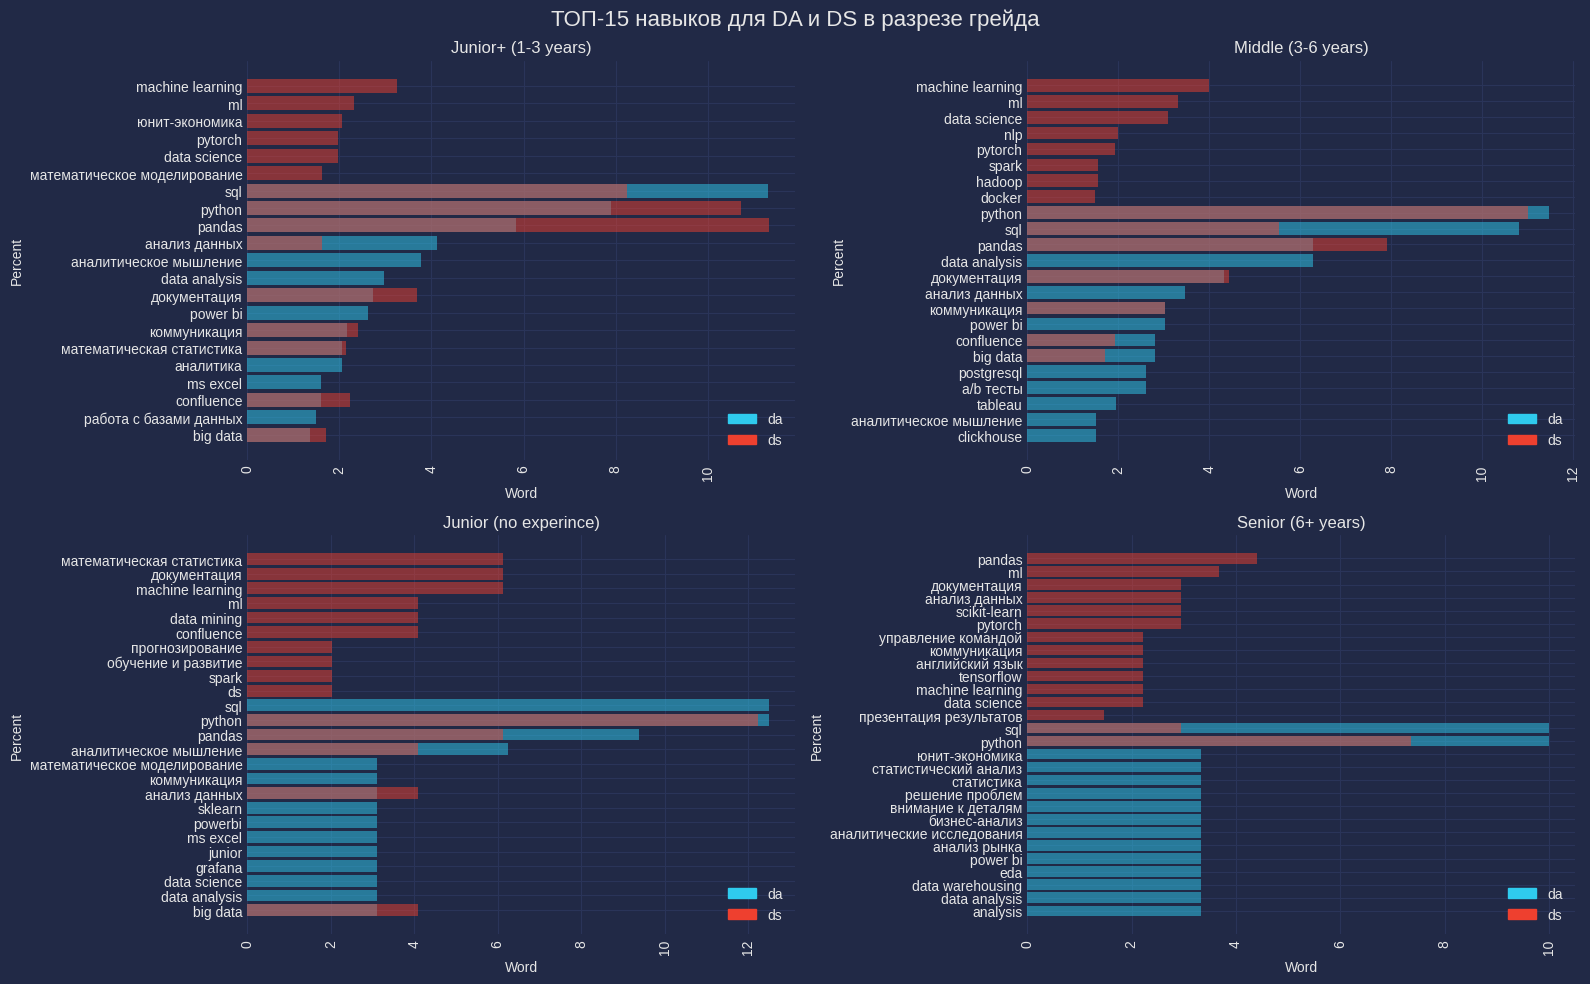

In [41]:
final_func(array_da, array_ds)

Перед изложением вывода стоит отметить, что выборка может негативно повлиять на кажущиеся очевидными соедующие тезисы. Анализ вакансий показывает, что независимо от уровня квалификации и специализации, работодатели высоко оценивают умение кандидатов владеть SQL, Python и базовыми статистическими знаниями. Для аналитиков всех уровней, за исключением Senior, также важно владение Excel, в то время как для более опытных профессионалов этот навык уже не столь важен. Ключевой особенностью вакансий для аналитиков является способность работать с BI-системами, такими как Power BI и Tableau. Переходя на уровень Junior+ аналитика, приобретает значение умение владеть процессами ETL и инструментами, такими как Airflow. Для Senior аналитиков становятся ключевыми знания Spark и Greenplum, а также знание английского языка.

Вакансии для дата-саентистов выделяются требованиями к специализированным навыкам в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью инструментов, таких как Docker и Spark. Также знание статистики является очень важным в работе Data Science, как и работа со специализированной документацией.


---


Если кратко, то тамые важные Hard skills:
- da: sql, python, bi
- ds: python, sql, ml, PyTorch
<br>Soft Skills:
- da: аналитическое мышление, коммуникация
- ds: аналитическое мышление, коммуникация


---

Отсюда мы делаем следующий вывод, что профессии Data Analyst и Data Scientist очень близки друг к другу. На начальных этапах в плане базовых навыков практически равны между собой. Лишь при обретении большего опыта у них начинаются расхождения в изучении более узконаправленноых навыков и инструментов.

### 3.3 Определим типичное место работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [42]:
def barchart(df, slice, title):

    df_slice_da_1 = df[(df['occupation'] == 'da') & (df['experience'] == 'Junior (no experince)')]
    df_slice_da_2 = df[(df['occupation'] == 'da') & (df['experience'] == 'Junior+ (1-3 years)')]
    df_slice_da_3 = df[(df['occupation'] == 'da') & (df['experience'] == 'Middle (3-6 years)')]
    df_slice_da_4 = df[(df['occupation'] == 'da') & (df['experience'] == 'Senior (6+ years)')]
    df_slice_ds_1 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Junior (no experince)')]
    df_slice_ds_2 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Junior+ (1-3 years)')]
    df_slice_ds_3 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Middle (3-6 years)')]
    df_slice_ds_4 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Senior (6+ years)')]

    pivot_tables = []

    for dataframe in [df_slice_da_1, df_slice_da_2, df_slice_da_3, df_slice_da_4, df_slice_ds_1, df_slice_ds_2, df_slice_ds_3, df_slice_ds_4]:
        pivot_table = (
            dataframe
            .pivot_table(index=slice, values='id', aggfunc='count')
            .rename(columns={'id': "values"})
            .sort_values(by='values', ascending=False)
            .head(10)
            .reset_index()
        )
        pivot_tables.append(pivot_table)

    fig, axes = plt.subplots(2, 4, figsize=(16, 5))
    fig.suptitle(title, fontsize=16)
    colors = ['#2FCBEE', '#EE402F']

    titles = [
        'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)',
        'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'
    ]

    for i, ax in enumerate(axes.flat):
        color = colors[0] if i < 4 else colors[1]
        occupation = 'Дата аналитики' if i < 4 else 'Дата саентисты'
        ax.barh(pivot_tables[i][slice], pivot_tables[i]['values'], color=color)
        ax.set_xlabel('Количество вакансий')
        ax.set_ylabel(f"ТОП-10 {slice}")
        ax.set_title(f"{occupation} {titles[i]}")
        ax.invert_yaxis()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [43]:
def piechart(df, slice, title):
    df_slice_da_1 = df[(df['occupation'] == 'da') & (df['experience'] == 'Junior (no experince)')]
    df_slice_da_2 = df[(df['occupation'] == 'da') & (df['experience'] == 'Junior+ (1-3 years)')]
    df_slice_da_3 = df[(df['occupation'] == 'da') & (df['experience'] == 'Middle (3-6 years)')]
    df_slice_da_4 = df[(df['occupation'] == 'da') & (df['experience'] == 'Senior (6+ years)')]
    df_slice_ds_1 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Junior (no experince)')]
    df_slice_ds_2 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Junior+ (1-3 years)')]
    df_slice_ds_3 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Middle (3-6 years)')]
    df_slice_ds_4 = df[(df['occupation'] == 'ds') & (df['experience'] == 'Senior (6+ years)')]

    pivot_tables = []

    for dataframe in [df_slice_da_1, df_slice_da_2, df_slice_da_3, df_slice_da_4, df_slice_ds_1, df_slice_ds_2, df_slice_ds_3, df_slice_ds_4]:
        pivot_table = (
            dataframe
            .pivot_table(index=slice, values='id', aggfunc='count')
            .rename(columns={'id': "values"})
            .sort_values(by='values', ascending=False)
            .reset_index()
        )
        pivot_tables.append(pivot_table)

    fig = make_subplots(
        rows=2, cols=4,
        specs=[[{'type': 'domain'}]*4]*2,
        subplot_titles=[
            'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)',
            'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'
        ],
        horizontal_spacing=0.1,
        vertical_spacing=0.05,
    )

    titles = [
        'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)',
        'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'
    ]

    for i, pivot_table in enumerate(pivot_tables):
        row = i // 4 + 1
        col = i % 4 + 1
        occupation = 'Дата аналитики' if i < 4 else 'Дата саентисты'
        fig.add_trace(
            go.Pie(labels=pivot_table[slice], values=pivot_table['values'], name=f"{occupation} {titles[i]}"),
            row=row, col=col
        )

    fig.update_layout(
        title={
            'text': title,
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        height=800,
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.1,
            xanchor="center",
            x=0.5
        )
    )

    fig.show()

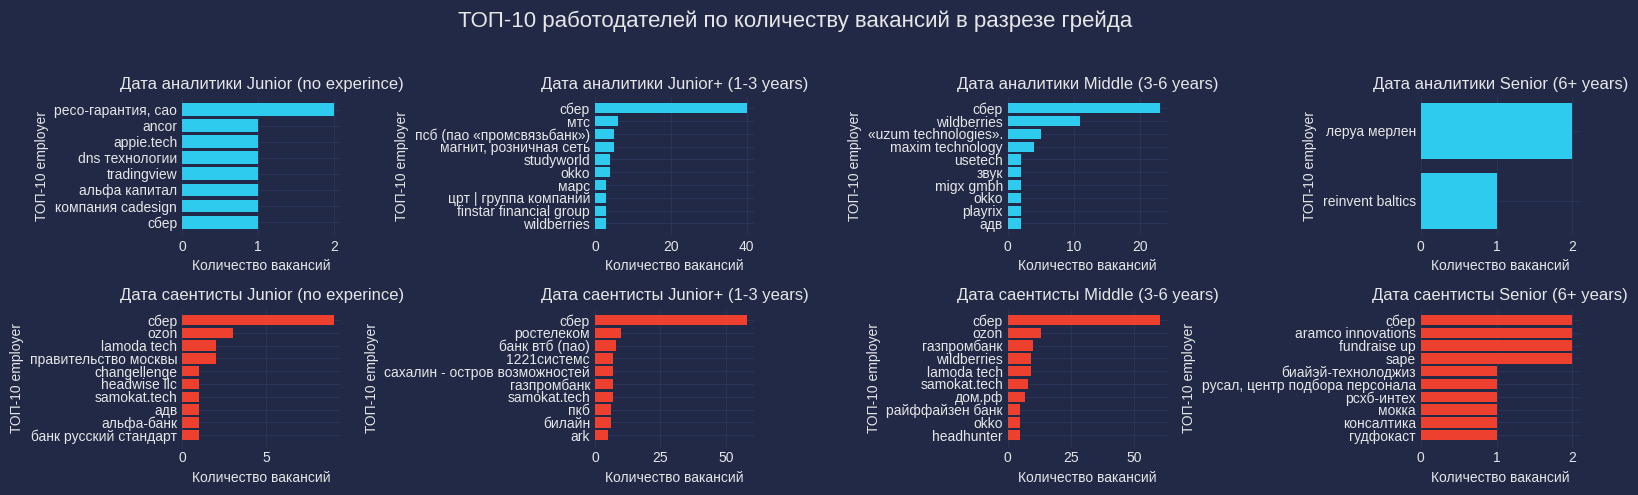

In [44]:
barchart(df, 'employer', "ТОП-10 работодателей по количеству вакансий в разрезе грейда")

Анализ рынка труда показывает, что Сбербанк лидирует по числу вакансий, особенно среди вакансий на data scientist. Онлайн-ритейлеры, такие как OZON и Wildberries, активно ищут новые кадры, предлагая множество вакансий в этих сегментах. Очень приятно видеть здесь правительство Москвы:)

In [45]:
piechart(df, 'salary_bin', "Распределение количества вакансий по уровню ЗП")

В подавляющем большенстве вакансий ЗП не указаны. Заметно, что у датасаентистов при том же опате работы вакансий с более высоким уровнем ЗП немного больше, что говорит нам о том, что такие специалисты, овладевшие определенными навыками в данной профессии смогут зарабатывать немного больше, чем их коллеги из аналитики. Конечно к уровню Middle ситуация немного выравнивается. Сделать какие-либо выводы с такой выборкой очень тяжело сделать конкретные выводы.

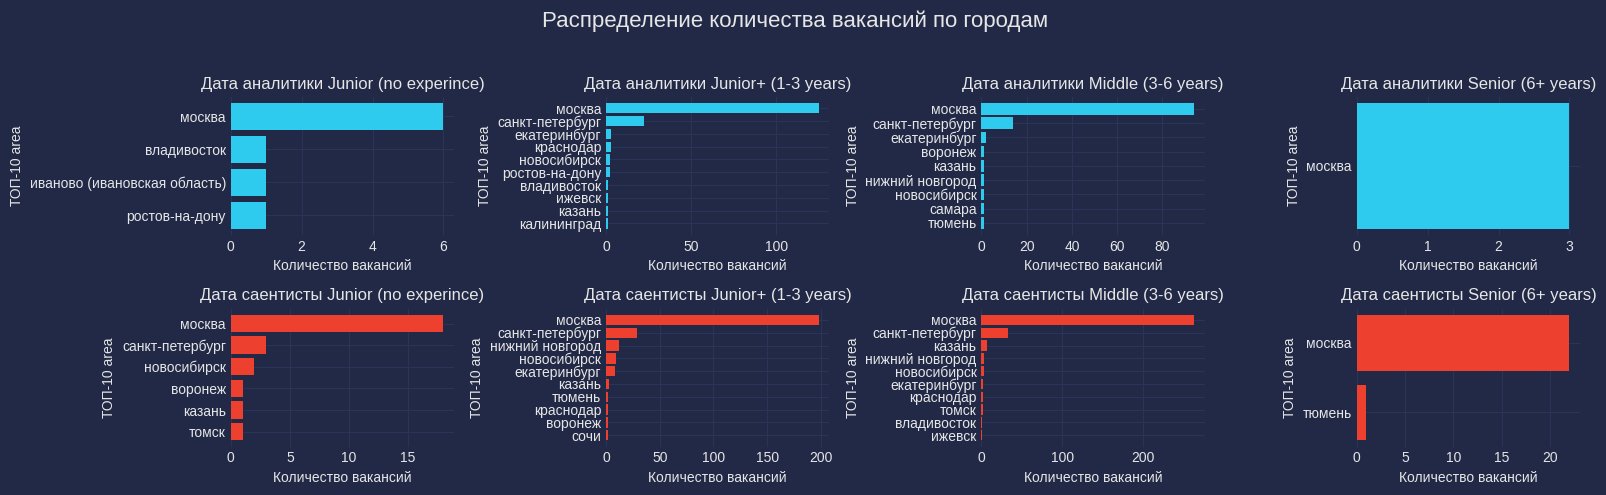

In [46]:
barchart(df, 'area', "Распределение количества вакансий по городам")

Москва и Санкт-Петербург очевидно лидируют по количеству вакансий, так как именно там рпсположено наибольшее количество офисов компаний.

In [47]:
piechart(df, 'schedule', "Распределение количества вакансий по графику работы")

Анализ данных указывает на то, что с ростом требуемого уровня опыта для аналитических должностей увеличивается доля вакансий, предлагающих возможность удаленной работы. Однако в сфере Data Science наблюдается большая лояльность у удаленной работе, начиная с самого первого уровня по опыту специалиста.

In [48]:
piechart(df, 'employment', "Распределение количества вакансий по типу занятости")

Для такой серьезной профессии подавляющее количества вакансий предусматривают полную занятость. Частичная занятость присутствует, но это скорее исключения.


### 3.4 Расчитаем помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science отдельно для грейдов Junior, Junior+, Middle, Senior.

In [49]:
df['week'] = df['published_at'].dt.isocalendar().week

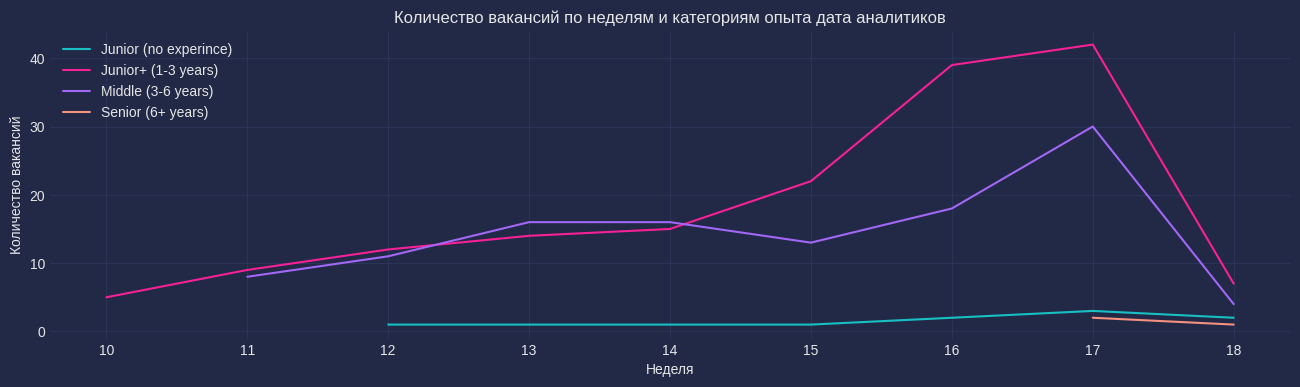

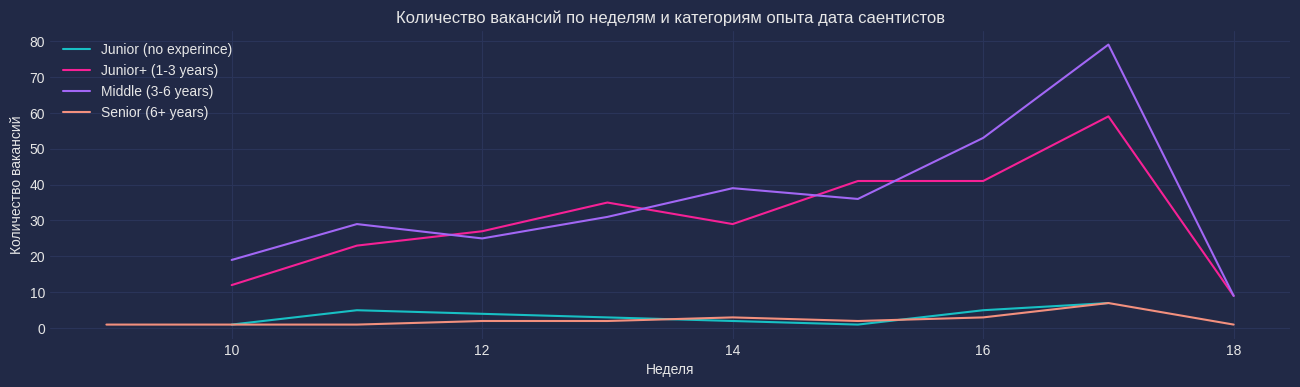

In [50]:
df_time_da = (
    df
    .query('occupation=="da"')
    .pivot_table(index=['week', 'experience'], values='id', aggfunc='count')
    .reset_index()
    .rename(columns={'id': 'number'})
)

df_time_ds = (
    df
    .query('occupation=="ds"')
    .pivot_table(index=['week', 'experience'], values='id', aggfunc='count')
    .reset_index()
    .rename(columns={'id': 'number'})
)

plt.figure(figsize=(16, 4))

for experience, data in df_time_da.groupby('experience'):
    plt.plot(data['week'], data['number'], label=experience)

plt.xlabel('Неделя')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по неделям и категориям опыта дата аналитиков')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 4))

for experience, data in df_time_ds.groupby('experience'):
    plt.plot(data['week'], data['number'], label=experience)

plt.xlabel('Неделя')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по неделям и категориям опыта дата саентистов')
plt.legend()
plt.grid(True)
plt.show()

С середины апреля наблюдается резкий пик новых ваканчий, причем одновременно и у аналитиков и специалистов data science. Но что интересно, рост наблюдается именно у вакансий средних грейдов, а у Junior и Senior стабильно низкое значение вакансий.

 ### Выводы:

1. Сбербанк занимает лидирующие позиции по количеству вакансий, за исключением Senior-позиций. Компании, такие как Магнит и ВТБ, также активно набирают начинающих аналитиков. Онлайн-ритейлеры, вроде OZON и Wildberries, также предлагают множество вакансий.

2. Большинство специалистов предлагают полную занятость, за исключением начинающих аналитиков без опыта, которым чаще предлагаются стажировки.

3. С ростом опыта у аналитиков увеличивается доля предложений о удаленной работе. В сфере Data Science наблюдается обратная тенденция, с меньшим количеством полных рабочих дней для начинающих специалистов.

4. Начинающие специалисты обычно получают зарплату ниже 100 тыс. рублей. Зарплата Senior-специалистов неопределенна из-за недостатка данных. Однако, сравнивая зарплаты junior+ и middle специалистов, можно отметить, что зарплаты датасаентистов обычно выше, чем у аналитиков.

5. Спрос на аналитиков данных на рынке труда превышает спрос на датасаентистов более чем в полтора раза, что указывает на широкий спектр возможностей для трудоустройства в данной области. Особенно высок спрос на специалистов уровня Junior+ среди аналитиков, в то время как вакансии для датасаентистов в основном находятся на уровнях Middle и Junior+. Это подчеркивает различия в требованиях к опыту в зависимости от специализации.

6. Анализ рынка вакансий показывает, что независимо от уровня и специализации, работодатели ценят у кандидатов знание SQL, Python и основ статистики. Для аналитиков на всех уровнях, за исключением Senior, важен навык работы с Excel, тогда как для более опытных аналитиков этот инструмент уже не так важен. Также важным для вакансий аналитиков является умение работать с BI системами, такими как Power BI и Tableau. На уровне Junior+ аналитика приобретает значение владение ETL процессами и инструментами, включая Airflow. Для Senior аналитиков ключевыми становятся знания Spark и Greenplum.

7. Вакансии датасаентистов отличаются специализированными навыками в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью инструментов, таких как Docker и Spark.

8. В целом, исследование подтверждает, что рынок труда в области аналитики данных и Data Science является динамичным и разнообразным, предлагая множество возможностей для специалистов различного уровня. Это требует гибкости соискателей и четкого понимания потребностей компаний в специалистах для привлечения подходящих кадров.